# Домашнее задание 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

$\begin{align}
& (1\ балл)\ 1.\ Сгенерируйте \ датасет\ из\ 500\ точек\ на\ плоскости,\ для\ которых\ y = 0.5x + 1 + \epsilon,\ где\ \epsilon \sim \mathcal{N}(0, 0.2) \\
&(воспользуйтесь\ модулем\ numpy.random)\end{align}$

In [2]:
# your code here

In [3]:
x_array = [round(i*0.001, 3) for i in range(500)]
y_array = [0.5*i + 1 + np.random.uniform(0, 0.2) for i in x_array]
d = {'x': x_array, 'y': y_array}

In [4]:
df = pd.DataFrame(data=d)
df

,x,y
0,0.000,1.049702
1,0.001,1.073658
2,0.002,1.152843
3,0.003,1.167409
4,0.004,1.023661
...,...,...
495,0.495,1.376429
496,0.496,1.367718
497,0.497,1.447238
498,0.498,1.284002


$\begin{align}
& (1\ балл)\ 2.\ Визуализируйте\ выборку
\end{align}$

In [5]:
# your code here

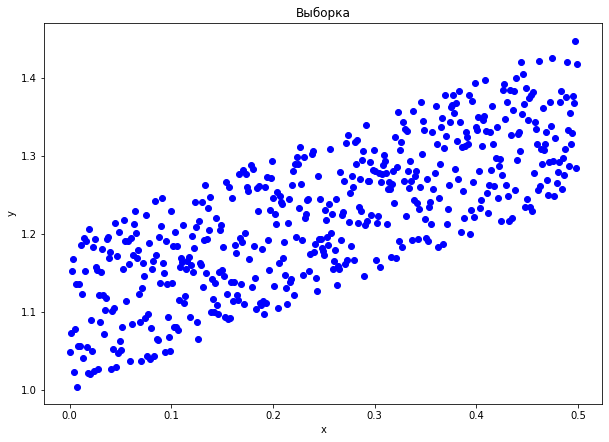

In [6]:
plt.figure(figsize=[10, 7])
plt.plot(df['x'], df['y'], 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Выборка')
plt.show()

$\begin{align}
&(2\ балла)\ 3.\ Восстановите\ по\ выборке\ зависимость\ y(x),\ считая,\ что\ зависимость\ имеет\ вид\ y\ =\ ax+b,
и\ минимизируя\\ & среднеквадратическое\ отклонение\ на\ обучающей\  выборке,\ воспользовавшись\ scipy.optimize.minimize. \\
& Визуализируйте\ восстановленную\ прямую.
\end{align}$

In [7]:
# your code here
from scipy.optimize import minimize

In [8]:
# расчет функции
def func(coef):
    a, b = coef
    y = a*df['x'] + b
    return y

In [9]:
# среднеквадратическое отклонение (что нужно минимизировать)
def sr_otkl(coef):
    y = func(coef)
    rez = np.sqrt(np.sum((y - df['y'])**2) / len(df['y']))
    return rez

In [10]:
# начальное предположение о значении коэффициентов
coef_0 = np.zeros(2)
# поиск коэффициентов
sol = minimize(sr_otkl, coef_0)
# результат
coef = sol.x
y_new = func(coef)
print('a =', coef[0])
print('b =', coef[1])
print('y = {}x + {}'.format(round(coef[0], 1), np.round(coef[1], 1)))

a = 0.49431849711009873
b = 1.1001880145691045
y = 0.5x + 1.1


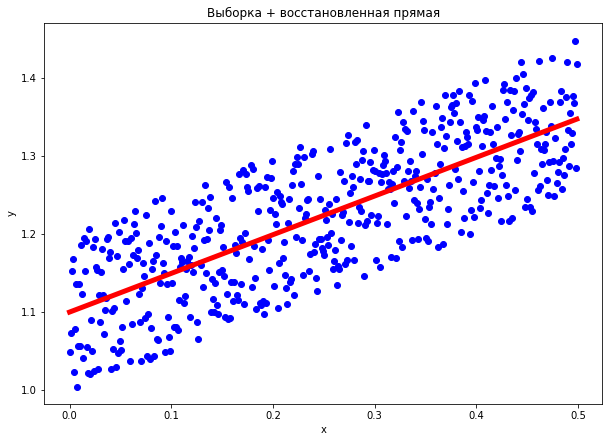

In [11]:
# визуализация
plt.figure(figsize=[10, 7])
plt.plot(df['x'], df['y'], 'bo')
plt.plot(df['x'], y_new, 'r', linewidth=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Выборка + восстановленная прямая')
plt.show()

$
\begin{align}
& (2\ балла)\ 4.\ Добавьте\ теперь\ в\ выборку\ 75\ точек,\ для\ которых\ y = -1 + \epsilon ,\ а\ x\ принимает\ различные\ 
значения\ из\ того\ же\ диапазона,\\ &  что\ и\ у\ уже\ имевшихся\ точек\ в\ обучающей\ выборке.\ По\ новой\ расширенной\ выборке\ снова\ попробуйте\ восстановить\\ & зависимость\ y(x) = ax + b\ 
двумя\ способами:\\ & \cdot минимизируя\ среднеквадратическое\ отклонение\ и\\ & \cdot минимизируя\ среднее\ абсолютное\ отклонение.\\ & Визуализируйте\ полученные\ 
прямые\ и\ сгенерированный\ датасет\ на\ одном\ изображении.
\end{align}$

In [12]:
# your code here

In [13]:
x_array_new = [np.random.uniform(0, 0.5) for _ in range(75)]
x_array.extend(x_array_new)

In [14]:
y_array_new = [-1 + np.random.uniform(0, 0.2) for _ in x_array_new]
y_array.extend(y_array_new)

In [15]:
d_new = {'x': x_array, 'y': y_array}
df = pd.DataFrame(d_new)
df.tail()

,x,y
570,0.175354,-0.894014
571,0.472951,-0.822924
572,0.390969,-0.914281
573,0.350110,-0.987916
574,0.122629,-0.839426


In [16]:
# абсолютное отклонение (что нужно минимизировать)
def otkl(coef):
    y = func(coef)
    rez = np.sum(abs(y - df['y'])) / len(df['y'])
    return rez

In [17]:
# начальное предположение о значении коэффициентов
coef_0 = np.zeros(2)
# поиск коэффициентов
sol_sr_otkl = minimize(sr_otkl, coef_0)
sol_otkl = minimize(otkl, coef_0)
# результат
coef_sr_otkl = sol_sr_otkl.x
coef_otkl = sol_otkl.x
y_new_1 = func(coef_sr_otkl)
y_new_2 = func(coef_otkl)
print('Результат на основе ср.кв. отклонения \n')
print('a =', coef_sr_otkl[0])
print('b =', coef_sr_otkl[1])
print('y = {}x + {}'.format(round(coef_sr_otkl[0], 1), np.round(coef_sr_otkl[1], 1)))
print('\nРезультат на основе абсолютного отклонения \n')
print('a =', coef_otkl[0])
print('b =', coef_otkl[1])
print('y = {}x + {}'.format(round(coef_otkl[0], 1), np.round(coef_otkl[1], 1)))

Результат на основе ср.кв. отклонения 

a = 0.5655112826167642
b = 0.8063554354700995
y = 0.6x + 0.8

Результат на основе абсолютного отклонения 

a = 0.49778065977411984
b = 1.0852831565263688
y = 0.5x + 1.1


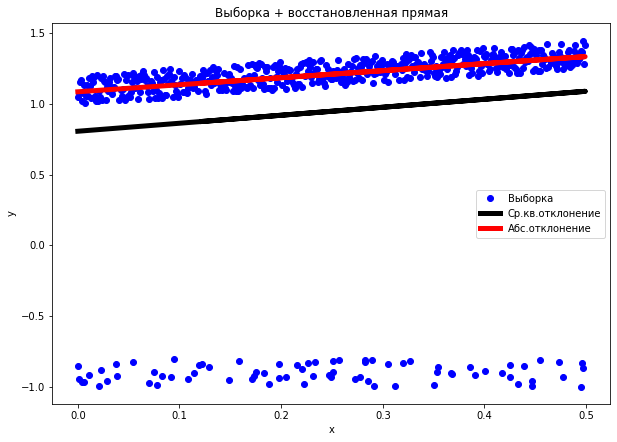

In [18]:
# визуализация
plt.figure(figsize=[10, 7])
plt.plot(df['x'], df['y'], 'bo')
plt.plot(df['x'], y_new_1, 'black', linewidth=5)
plt.plot(df['x'], y_new_2, 'r', linewidth=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Выборка', 'Ср.кв.отклонение', 'Абс.отклонение'])
plt.title('Выборка + восстановленная прямая')
plt.show()

$\begin{align}
& (1\ балла)\ 5.\ На\ основе\ полученных\ графиков\ сделайте\ вывод\ об\ устойчивости\ моделей,\ оптимизирующих\ среднеквадратическое\\ & отклонение\ и\ среднее\ абсолютное\ отклонение,\ к\ выбросам.
\end{align}$

Модели, оптимизирующие среднее абсолютное отклонение, менее чувствительны к выбросам. Таким образом, данные модели БОЛЕЕ устойчивы к выбросам, чем модели, оптимизирующие среднеквадратичное отклонение.

$
\begin{align}
(4\ балла)\ 6.\ Реализуйте\ линейную\ регрессию\ (используйте\ векторизованные\ операции\ из\ библиотеки\ numpy)
\end{align}$

$
\begin{align}
Пример\ векторизованных\ операций
\end{align}$

In [19]:
class MyLinearRegression:
    def __init__(self, n_iter=1000):
        self.w = None
        self.b = None
        self.n_iter = n_iter # число итераций
        self.lambda_ = 0.01 # шаг градиентного спуска
        
    def fit(self, X, y):
        # инициализация весов модели
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0
        
        # напишите цикл, на каждом шаге которого
        # обновляются веса модели
        
        # начало кода
        for i in range(self.n_iter):
            delta = X.dot(self.w) + self.b - y
            self.w = self.w - self.lambda_ * (2./y.shape[0]) * \
                                                X.T.dot(delta)
            self.b = self.b - self.lambda_ * (2./y.shape[0]) * \
                                                np.sum(delta)
                                                
        # конец кода
    
    # напишите функцию ошибки
    # (среднеквадратическое отклонение)
    def loss(self, y_true, X):
        # начало кода
            delta = X.dot(self.w) + self.b - y
            rez = np.sqrt((1./y_true.shape[1]) * (linalg(delta)**2))
            return rez
        # конец кода
        
    # напишите предсказание модели 
    def predict(self, X):
        # начало кода
        return X.dot(self.w) + self.b
        # конец кода

$
\begin{align}
Проверка\  линейной\ регрессии
\end{align}$

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.random.seed(2020)
x = np.linspace(0, 10, 500)
y = 0.5 * x + 1 + np.sqrt(0.2) * np.random.randn(500)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2020)
linear_model = MyLinearRegression()
linear_model.fit(X_train, y_train)
mse = mean_squared_error(y_test, linear_model.predict(X_test))
assert mse < 0.19

$
\begin{align}
7. \ Изобразите\ на\ одном\ графике\ прямую,\ получаемую\ вашей\ линейной\ регрессией,\ и\  исходные\  точки\  x,\ y
\end{align}$

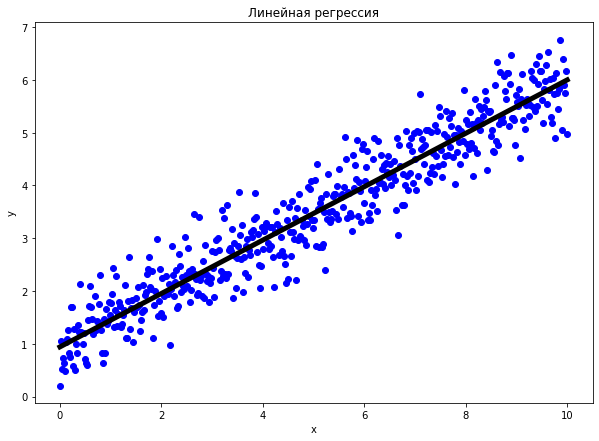

In [21]:
# визуализация
plt.figure(figsize=[10, 7])
plt.plot(x, y, 'bo')
plt.plot(x, linear_model.predict(x), 'black', linewidth=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.show()